In [ ]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=[]
for line in open('/content/gdrive/MyDrive/iris.data', 'r'):
  raw = line.split(",")
  x = [float(r) for r in raw[:4]]
  y = raw[4].strip()
  data.append((x,y))
data

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


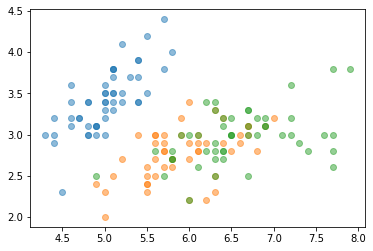

In [ ]:
classes = {l:[] for v,l in data} # iris 종류
# classes = {'Iris-setosa': [], 'Iris-versicolor': [], 'Iris-virginica': []} 형태의 dict

for v, l in data:
  classes[l].append(v)

for c, c_data in classes.items():
  # c:Iris-setosa 외 2개
  # c_data : [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], ..... [5.0, 3.3, 1.4, 0.2]] 외 2개

  X = []
  Y = []  
  for v in c_data:
    X.append(v[0])
    Y.append(v[1])

  plt.scatter(X,Y,alpha=0.5)

plt.show()

In [ ]:
#두 점 사이의 거리 구하는 함수
# a = [6.4, 2.8, 5.6, 2.2]
# b = [5.9, 3.0, 5.1, 1.8] 이런 식의 파라미터
def distance(a,b):
   return sum((x-y)**2 for x,y in zip(a,b))**0.5

In [ ]:
from collections import Counter
# counter : list에서 어떤 원소가 몇 번 나왔는지 dict 형태로 알려줌

#query점과 모든 벡터들의 거리 구해서 가장 가까운 k개의 점 구하고, 클러스터 리턴
def knn_classify(k, query, data):
  while(True):
    dists = [(distance(query,v),l) for v,l in data] #거리 구하고
    # dists = [(3.5,Iris-setosa), (34.8, Iris-virginica), ...., (5.7, Iris-setosa)]

    dists.sort() #거리순으로 정렬해서
    # dists = [(3.5,Iris-setosa), (5.7, Iris-setosa), ....., (34.8, Iris-virginica)]

    topk = dists[:k] #가장 가까운 k(=3)개 뽑기
    #topk = [(3.5,Iris-setosa), (5.7, Iris-setosa), (5.9, Iris-Iris-versicolor)]

    cnts = Counter(l for d,l in topk) 
    #cnts = { Iris-setosa:2, Iris-versicolor:1 }

    mc = cnts.most_common(2) #가장 많은 거 2개를 가져오라는 뜻
    #mc = [('Iris-setosa', 2), (Iris-versicolor, 1)]

    if len(cnts) == 1 or mc[0][1]!=mc[1][1]:
      break
    else:
      k=-1
  return cnts.most_common(1)[0][0]
k = 3
res = knn_classify(k,[6.4,2.8,5.6,2.2], data)
print(res)

Iris-virginica


In [ ]:
k = 3
n_correct = 0
n_incorrect = 0

for i,(v,l) in enumerate(data):
  new_data = []
  for j,d in enumerate(data):
    if i==j : continue
    new_data.append(d)
  ans = knn_classify(k,v,new_data)
  if l==ans:
    n_correct += 1
  else:
    n_incorrect += 1
print("accuracy", n_correct /(n_correct + n_incorrect))


accuracy 0.96


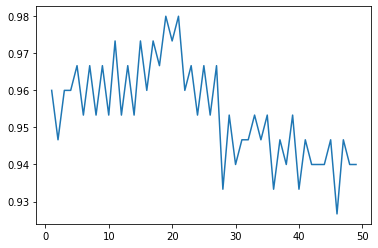

In [ ]:
X = []
Y = []
for k in range(1,50):
  n_correct = 0
  n_incorrect = 0
  for i,(v,l) in enumerate(data):
    new_data = []
    for j,d in enumerate(data):
      if i==j : continue
      new_data.append(d)
    ans = knn_classify(k,v,new_data)
    if l==ans:
      n_correct += 1
    else:
      n_incorrect += 1
  accuracy = n_correct /(n_correct + n_incorrect)
  X.append(k)
  Y.append(accuracy)

plt.plot(X,Y)
plt.show()